In [21]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option("display.max_columns", 30)
table = load_breast_cancer()
x = pd.DataFrame(table.data, columns=[table.feature_names])
y = pd.Series(table.target)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LogisticRegression(
    C=82, penalty="l1", solver="liblinear", max_iter=200)
model.fit(x_train, y_train)

result = model.score(x_test, y_test)
result


0.9649122807017544

In [23]:
from sklearn.metrics import roc_curve

predict = model.predict_proba(x_test)
probs = predict[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

print("TPR: ", tpr)  # = TP / (TP+FN)
print("FPR: ", fpr)  # = FP / (FP+TN)
print("Thresholds: ", thresholds)


TPR:  [0.         0.00877193 0.99122807 0.99122807 1.         1.        ]
FPR:  [0.        0.        0.        0.0877193 0.0877193 1.       ]
Thresholds:  [1.99999996e+00 9.99999959e-01 7.19601785e-01 5.69196539e-01
 1.94562906e-01 2.89170338e-78]


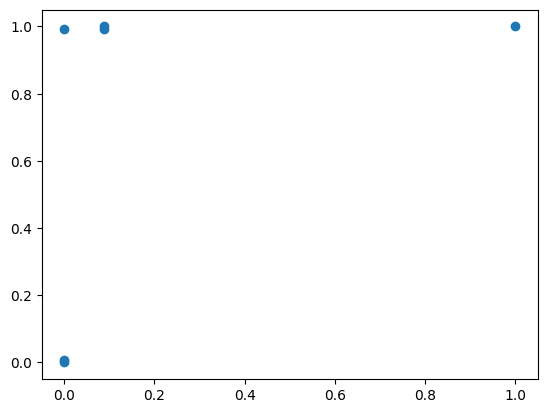

In [24]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.show()


In [25]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, probs))  # Area Under Curve


0.9992305324715296
